In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
csv_path = 'markers.csv'
df = pd.read_csv(csv_path)

In [3]:
for col in sorted(df.columns):
    
    if 'year' not in col:
        continue
    
    print(col)

accident_year


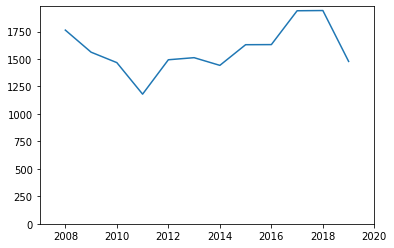

In [4]:
df[df.accident_severity == 2].accident_year.value_counts().sort_index().plot.line(
    
    xlim=(
        df.accident_year.min() - 1,
        df.accident_year.max() + 1,
    ),
    ylim=(0, None),
);